In [ ]:
# [CH2] - 개인 과제
# 1. **지도학습 과제** :: 주택 가격 예측 모델 구축
#  
# 1) 지도 학습의 기본 개념과 회귀 분석을 이해, 실제 데이터에 적용
# 2) 데이터 전처리 및 탐색, 데이터의 품질을 높이는 방법과 특징 선택
# 3) 여러 회귀 모델의 이해: 다양한 회귀 기법의 원리와 적용 방법
#  - 선형 회귀, 의사결정나무, 랜덤 포레스트 등
# 
# 4) 모델 성능 평가: 성능 지표의 이해 및 비교 분석을 통해 최적의 모델 선택
#  - **Mean Absolute Error (MAE)**: 예측값과 실제값의 절대 오차의 평균
#  - **Mean Squared Error (MSE)**: 예측값과 실제값의 제곱 오차의 평균
#  - **R² Score**: 모델이 데이터의 변동성을 얼마나 설명하는지 나타내는 지표
#  - 각 모델의 성능을 비교하고 최적의 모델을 선택하여 결과를 시각화 (matplotlib or seaborn)

# CRIM      - per capita crime rate by town                                         (마을별 1인당 범죄율)
# ZN        - proportion of residential land zoned for lots over 25,000 sq.ft       (25,000평방피트 이상의 부지에 대해 구획된 주거용 토지의 비율)
# INDUS     - proportion of non-retail business acres per town                      (도시당 비소매 사업 면적 비율)
# CHAS      - Charles River dummy variable (1 if tract bounds river; 0 otherwise)   (Charles River 더미 변수(지역이 강의 경계를 이루는 경우 1, 그렇지 않은 경우 0))
# NOX       - nitric oxides concentration (parts per 10 million)                    (일산화질소 농도(1000만 분의 1))
# RM        - average number of rooms per dwelling                                  (주거당 평균 객실 수)
# AGE       - proportion of owner-occupied units built prior to 1940                (1940년 이전에 지어진 소유주 점유의 비율)
# DIS       - weighted distances to five Boston employment centres                  (보스턴 고용 센터 5곳까지의 가중 거리)
# RAD       - index of accessibility to radial highways                             (방사형 고속도로 접근성 지수)
# TAX       - full-value property-tax rate per $10,000                              ($10,000당 전액 재산세율)
# PTRATIO   - pupil-teacher ratio by town                                           (도시별 교사-학생 비율)
# B         - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town        (마을별 흑인 비율입니다)
# LSTAT     - % lower status of the population                                      (인구의 하위 지위 %)
# MEDV      - Median value of owner-occupied homes in $1000's                       (소유주가 거주하는 주택의 중간값 $1000$s)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [8]:
df = pd.read_csv('housingdata.csv')

In [5]:
df.head()
# print(df.isnull().sum())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
# Step 01. 데이터 전처리 - 1) 결측치 처리
# 1. 결측치 컬럼값 대체
df['CRIM']  = df['CRIM'].fillna(df['CRIM'].median())
df['ZN']    = df['ZN'].fillna(0)
df['INDUS'] = df['INDUS'].fillna(df['INDUS'].median())
df['CHAS']  = df['CHAS'].fillna(0)
df['AGE']   = df['AGE'].fillna(df['AGE'].median())

# 2. 컬럼 삭제
df = df.drop(['ZN', 'CHAS', 'AGE', 'TAX', 'B'], axis=1)

In [7]:
# 3. 결측값 예측을 통한 대체
df_with_na = df[df['LSTAT'].isnull()]
df_without_na = df[df['LSTAT'].notnull()]

# LSTAT과 상관관계 높은 컬럼 선택 (abs >= 0.5)
correlated_features = ['INDUS', 'NOX', 'RM', 'MEDV']

# 회귀 모델 학습
lr = LinearRegression()
X_train = df_without_na[correlated_features]
y_train = df_without_na["LSTAT"]
lr.fit(X_train, y_train)

# 결측값 예측
X_pred = df_with_na[correlated_features]
predicted_values = lr.predict(X_pred)

# 예측값으로 결측값 대체
df.loc[df["LSTAT"].isnull(), "LSTAT"] = predicted_values

In [41]:
# Step 01. 데이터 전처리 - 2) 이상치 탐지 및 제거
# 특정 열의 이상치 확인 (IQR 방법)
Q1 = df['LSTAT'].quantile(0.25)
Q3 = df['LSTAT'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 범위 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 확인
outliers = df[(df['LSTAT'] < lower_bound) | (df['LSTAT'] > upper_bound)]
print(outliers)

         CRIM  INDUS    NOX     RM     DIS  RAD  PTRATIO  LSTAT  MEDV
141   1.62864  21.89  0.624  5.019  1.4394    4     21.2  34.41  14.4
373  11.10810  18.10  0.668  4.906  1.1742   24     20.2  34.77  13.8
374  18.49820  18.10  0.668  4.138  1.1370   24     20.2  37.97  13.8
387  22.59710  18.10  0.700  5.000  1.5184   24     20.2  31.99   7.4
412  18.81100  18.10  0.597  4.628  1.5539   24     20.2  34.37  17.9
414  45.74610  18.10  0.693  4.519  1.6582   24     20.2  36.98   7.0
438  13.67810  18.10  0.740  5.935  1.8206   24     20.2  34.02   8.4


In [ ]:
# Step 01. 데이터 전처리 - 3) 특징 선택

In [17]:
# LSTAT과의 상관계수 계산
correlation_with_lstat = df.corr()['LSTAT']
print(correlation_with_lstat)
# 상관계수가 0.5 이상인 컬럼 필터링
high_corr_columns = correlation_with_lstat[correlation_with_lstat.abs() >= 0.4].index.tolist()

# 결과 출력
print(high_corr_columns)


CRIM       0.444943
ZN        -0.414193
INDUS      0.590690
CHAS      -0.047424
NOX        0.582641
RM        -0.614339
AGE        0.602891
DIS       -0.493328
RAD        0.479541
TAX        0.536110
PTRATIO    0.375966
B         -0.369889
LSTAT      1.000000
MEDV      -0.735822
Name: LSTAT, dtype: float64
['INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'LSTAT', 'MEDV']


In [34]:
for col in df.columns.tolist():
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 범위 설정
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 확인
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'**{col}**', len(outliers))
    print(outliers.index)
    
    # 삭제
    df = df.drop(outliers.index)

    # 대체
    # 
    print('--------------------------------------------------------')

**CRIM** 65
Index([356, 367, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 384,
       385, 386, 387, 388, 392, 398, 399, 400, 401, 402, 403, 404, 405, 406,
       407, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 422, 424,
       425, 427, 429, 431, 434, 435, 436, 437, 438, 439, 440, 441, 443, 444,
       445, 447, 448, 454, 468, 469, 477, 478, 479],
      dtype='int64')
--------------------------------------------------------
**ZN** 44
Index([ 39,  40,  54,  55,  56,  57,  65,  66, 193, 194, 195, 196, 197, 198,
       199, 200, 201, 202, 203, 204, 254, 255, 256, 283, 284, 285, 286, 287,
       288, 289, 290, 291, 292, 298, 299, 300, 343, 344, 347, 348, 351, 352,
       353, 354],
      dtype='int64')
--------------------------------------------------------
**INDUS** 0
Index([], dtype='int64')
--------------------------------------------------------
**CHAS** 32
Index([142, 154, 155, 160, 162, 163, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 234, 23

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. 데이터를 훈련 세트와 테스트 세트로 먼저 분리
X = df[['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']]
y = df[['MEDV']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
# 2. 훈련 세트에서 전처리(예: 스케일링) 적용
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 훈련 세트로 fit
X_test_scaled = scaler.transform(X_test)  # 테스트 세트에 동일한 transform 적용

# 결과 확인
print("훈련 세트 스케일링 후:\n", X_train_scaled)
print("테스트 세트 스케일링 후:\n", X_test_scaled)

훈련 세트 스케일링 후:
 [[-1.0140883  -0.96013656  0.94364035 -1.14455458 -1.60174615 -1.02212018]
 [-0.33465901 -0.14580618 -0.22219524 -0.60186597  1.1755678   0.89050635]
 [-0.27533254 -0.29993811  0.67970421 -0.14266793  1.13003807 -0.60521362]
 ...
 [-1.2005429  -1.02778336  0.47363641 -0.76288347 -0.64562168 -0.8326172 ]
 [ 1.07222575  1.58389665  0.46516787  1.53907038  0.81132991  1.50639104]
 [-0.27533254 -0.29993811  0.14900907 -0.14266793  1.13003807 -0.20455017]]
테스트 세트 스케일링 후:
 [[-1.48446242 -0.38556696  0.16453473 -0.6674657  -0.82774062 -0.41977142]
 [-0.57902755 -0.92502873  0.64724147 -0.91793736 -0.37244326 -1.16560101]
 [ 2.43390939  0.46215868 -0.44661154  1.80743288  0.76580017  0.80252282]
 [ 0.04248781 -1.21616683 -0.33087483 -0.6137932   0.35603254 -0.89623606]
 [ 1.07222575  1.35269874 -0.00342464  1.53907038  0.81132991  0.6942354 ]
 [ 0.32781986 -1.01065759 -0.02883026 -0.05917737  0.12838385 -0.02316875]
 [-0.08605287 -0.09442886 -0.54399974 -0.61975681 -0.00820536  

In [10]:
from sklearn.linear_model import LinearRegression

# X_train['LSTAT']  = X_train['LSTAT'].fillna(X_train['LSTAT'].median())
# X_test['LSTAT']  = X_test['LSTAT'].fillna(X_test['LSTAT'].median())

# 선형 회귀 모델 생성
lr = LinearRegression()

# 모델 학습
lr.fit(X_train_scaled, y_train)

# 모델 평가
print(lr.score(X_test_scaled, y_test))

# 모델 예측
# print(lr.predict([[50]]))

# 가중치 구하기
print(lr.coef_, lr.intercept_)

0.7470721693496465
[[ 0.28234093 -0.40943023  3.52210467 -0.60777204 -2.0272925  -3.38436614]] [22.69450549]


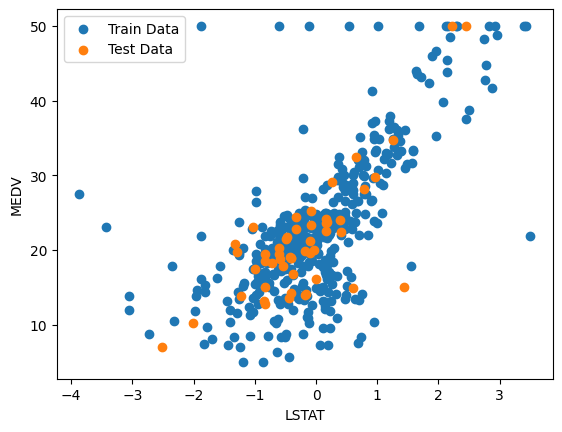

In [15]:
# # 산점도 구하기
# # 1. 훈련/테스트 세트 설정
# plt.scatter(X_train_scaled['LSTAT'], y_train)
# plt.scatter(X_test_scaled['LSTAT'], y_test)

# # 예측 값 설정
# # plt.scatter(50, 1241, marker='^')

# # 15 ~ 50 선형 직선 구하기
# # plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

# # 산점도 표시
# plt.xlabel('X')
# plt.ylabel('y')
# plt.show()

plt.scatter(X_train_scaled[:, 2], y_train, label="Train Data")  # 'LSTAT' 열은 5번째
plt.scatter(X_test_scaled[:, 2], y_test, label="Test Data")  # 'LSTAT' 열은 5번째
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.legend()
plt.show()